### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline

In [10]:
n_jobs = 16

# EDA,Sampling ,and Scaling

In [11]:
data = pd.read_csv('Twitter-Absolute-Sigma-500.data',header = None)

In [12]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Buzz']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

In [14]:
data.head(10)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.000000,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.000000,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.000000,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.000000,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.000000,169,98,101,90,96,95,185,1.0
5,775,765,935,806,912,1095,1198,614,588,751,...,1.0,1.000000,775,765,935,806,912,1095,1198,1.0
6,469,1092,332,354,357,676,1189,348,909,261,...,1.0,1.000000,469,1092,332,354,357,676,1189,1.0
7,818,693,756,1099,877,871,1409,578,516,546,...,1.0,1.000000,818,693,756,1099,877,871,1409,1.0
8,832,628,898,944,993,983,1037,543,432,627,...,1.0,1.000000,832,628,898,944,993,983,1037,1.0
9,920,1071,833,662,851,1096,1067,659,790,601,...,1.0,1.013109,920,1071,833,662,851,1096,1068,1.0


In [15]:

data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


In [16]:
data.columns

Index(['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0',
       'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1',
       'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4', 'AS(NA)_5', 'AS(NA)_6', 'BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1',
       'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1',
       'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4', 'AS(NAC)_5', 'AS(NAC)_6', 'CS_0',
       'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4',
       'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5',
       'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6',
       'Buzz'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0        140707 non-null int64
NCD_1        140707 non-null int64
NCD_2        140707 non-null int64
NCD_3        140707 non-null int64
NCD_4        140707 non-null int64
NCD_5        140707 non-null int64
NCD_6        140707 non-null int64
AI_0         140707 non-null int64
AI_1         140707 non-null int64
AI_2         140707 non-null int64
AI_3         140707 non-null int64
AI_4         140707 non-null int64
AI_5         140707 non-null int64
AI_6         140707 non-null int64
AS(NA)_0     140707 non-null float64
AS(NA)_1     140707 non-null float64
AS(NA)_2     140707 non-null float64
AS(NA)_3     140707 non-null float64
AS(NA)_4     140707 non-null float64
AS(NA)_5     140707 non-null float64
AS(NA)_6     140707 non-null float64
BL_0         140707 non-null float64
BL_1         140707 non-null float64
BL_2         140707 non-null float64
BL_3         140707 non-null 

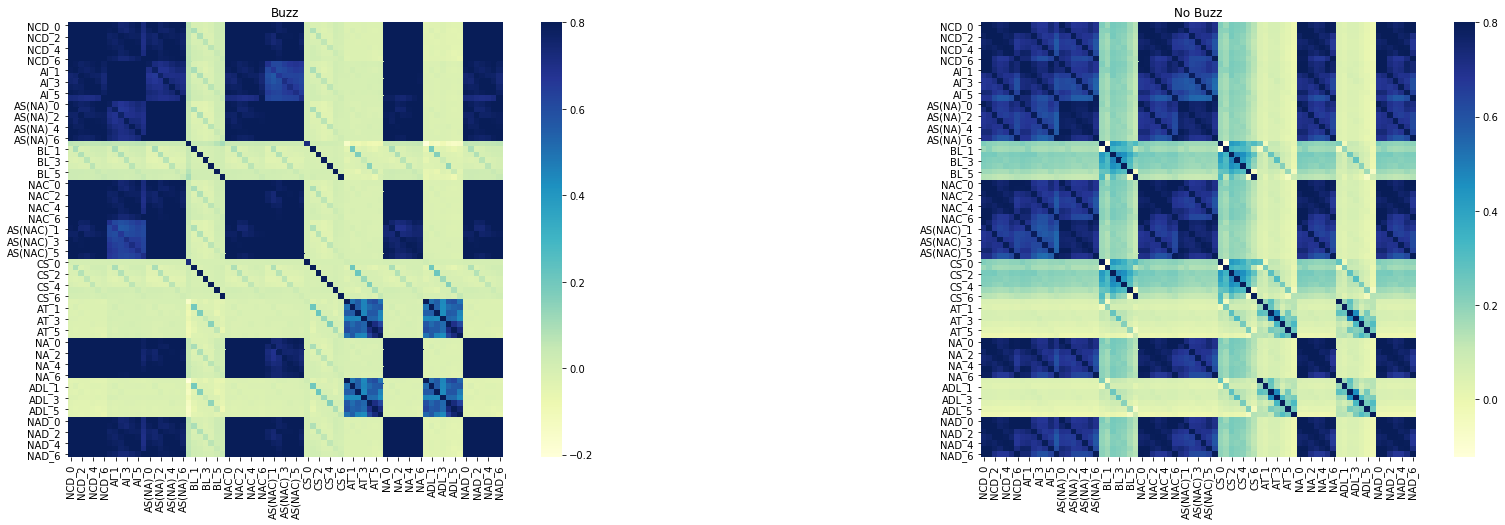

In [18]:
f, (ax1, ax2) = plt.subplots(1,2,figsize =(30, 8))

sns.heatmap(data.query('Buzz==1').drop(['Buzz'],1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Buzz')

sns.heatmap(data.query('Buzz==0').drop(['Buzz'],1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('No Buzz')

plt.show()

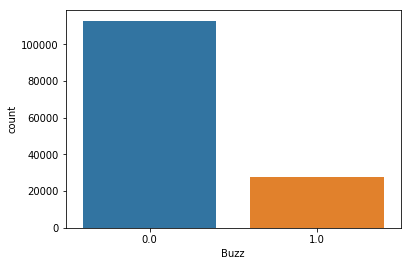

In [19]:
# Now lets check the class distributions for class imbalance 
sns.countplot('Buzz',data=data)
plt.show()

In [20]:
# now let us check in the number of Percentage
Count_Buzz = len(data[data["Buzz"]==1]) 
Count_No_Buzz = len(data[data["Buzz"]==0]) 
Percentage_of_Buzz = Count_Buzz/(Count_Buzz+Count_No_Buzz)
print("percentage of buzz is",Percentage_of_Buzz*100)
Percentage_of_No_Buzz= Count_No_Buzz/(Count_Buzz+Count_No_Buzz)
print("percentage of no buzz",Percentage_of_No_Buzz*100)

percentage of buzz is 19.739600730596205
percentage of no buzz 80.26039926940379


In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state = 0)

In [23]:
sample_data.shape

(14071, 77)

In [24]:
type(sample_data)

pandas.core.frame.DataFrame

In [25]:
sample_target.shape

(14071,)

In [26]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target,random_state = 0, test_size = 0.2)

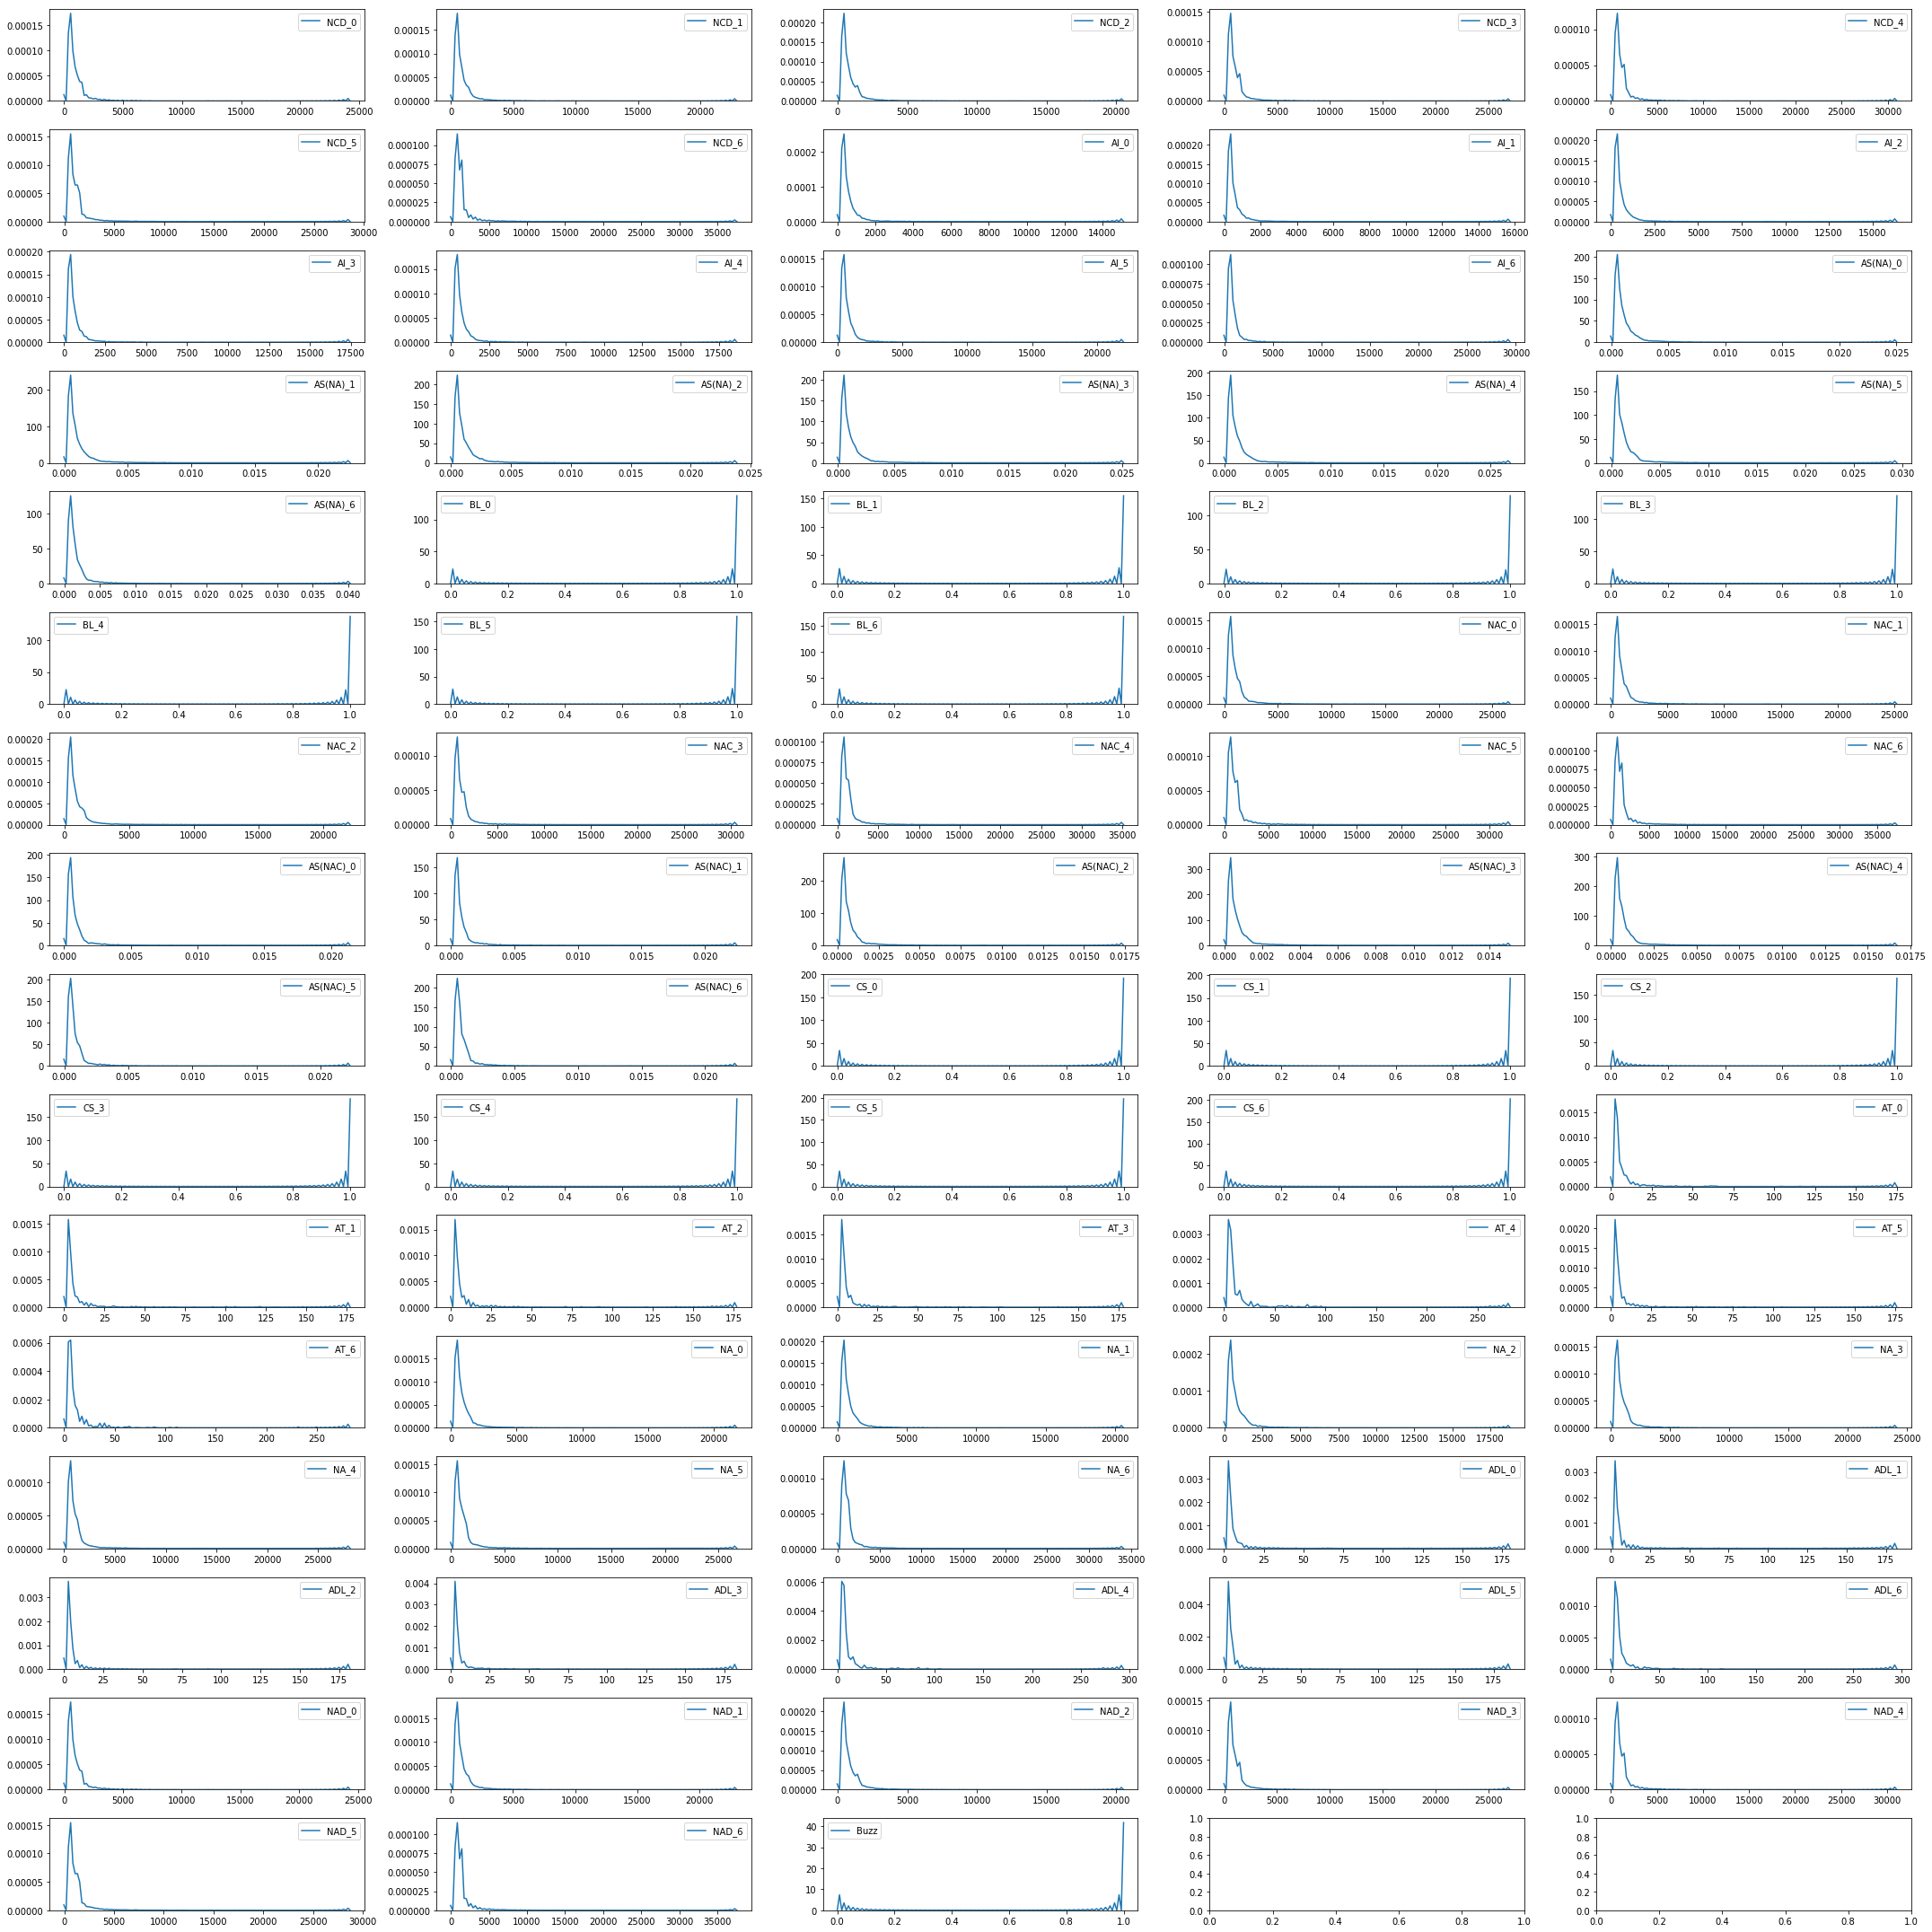

In [19]:
colnames = pd.Series(data.columns)
fig, axs = plt.subplots(16,5, figsize=(30, 30), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in colnames.index.values:
    sns.kdeplot(data[colnames[i]], ax=axs[i])
    fig.tight_layout()
plt.show()

# Data is not normally distributed within each feature, so standard scaler is not the best scaler to use. We have to use min max scaler which is suited for such non gaussian distributions

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\keeps\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
report_table = []

# Voting Classfier -1 with Hard Voting

In [37]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

In [26]:
log_clf = LogisticRegression(C= 1000, penalty='l2')
log_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)

svm_clf = SVC(C=100,gamma = 0.1, kernel ='rbf')
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svm',svm_clf)], voting ='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import f1_score 
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

LogisticRegression 0.8998144712430427
KNeighborsClassifier 0.8946395563770795
SVC 0.8998144712430427
VotingClassifier 0.9013035381750466


/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Voting Classifier -2 Hard Voting

In [27]:
svm_clf = LinearSVC(C = 100)
svm_clf.fit(X_train, y_train)

tree_clf = DecisionTreeClassifier(max_depth= 3,criterion='gini')
tree_clf.fit(X_train, y_train)

log_clf = LogisticRegression(C= 1000, penalty='l2')
log_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('tree', tree_clf),('lr', log_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (svm_clf, tree_clf,log_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

LinearSVC 0.9019248395967003
DecisionTreeClassifier 0.8928892889288927
LogisticRegression 0.8998144712430427
VotingClassifier 0.9094202898550725


/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Voting Classifier -1 Soft Voting

In [28]:
log_clf = LogisticRegression(C= 1000, penalty='l2')
log_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)

svm_clf = SVC(C=100,gamma = 1, kernel ='rbf', probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svm',svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', KNeig...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [29]:
from sklearn.metrics import f1_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))
    
y_pred = voting_clf.predict(X_test)
voting_classifier_soft_1 = f1_score(y_test, y_pred)

LogisticRegression 0.8998144712430427
KNeighborsClassifier 0.8946395563770795
SVC 0.904893813481071


/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


VotingClassifier 0.9056956115779645


/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Voting Classifier -2 Soft Voting

In [30]:
svm_clf = SVC(C = 1, probability = True, kernel = 'linear', gamma= 0.001)
svm_clf.fit(X_train, y_train)

tree_clf = DecisionTreeClassifier(max_depth= 3,criterion='gini')
tree_clf.fit(X_train, y_train)

log_clf = LogisticRegression(C= 1000, penalty='l2')
log_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('tree', tree_clf),('lr', log_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('tree', DecisionTreeClassifier(class_weight=None, cri...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [31]:
from sklearn.metrics import f1_score
for clf in (svm_clf, tree_clf,log_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

SVC 0.8878416588124411
DecisionTreeClassifier 0.8928892889288927
LogisticRegression 0.8998144712430427
VotingClassifier 0.9038817005545287


/home/abhiraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Bagging

###### Decision Tree with Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth= 3,criterion='gini',random_state=0)
bag_clf_dtree = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, max_features= 77,n_jobs = n_jobs, random_state=0)

bag_clf_dtree.fit(X_train, y_train)
y_pred_dtree = bag_clf_dtree.predict(X_test)

In [34]:
from  sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print({'f1-Score': f1_score(y_test, y_pred_dtree)})
print({'auc': roc_auc_score(y_test, y_pred_dtree)})

{'f1-Score': 0.9064486830154405}
{'auc': 0.937385164117052}


###### Logit Model with Bagging

In [35]:
log_clf = LogisticRegression(C= 1000, penalty='l2')

bag_clf_log = BaggingClassifier(log_clf, n_estimators=500, max_samples=100,max_features= 77, bootstrap=True, n_jobs=16, random_state=0)

bag_clf_log.fit(X_train, y_train)
y_pred_log = bag_clf_log.predict(X_test)

In [36]:
print({'f1-Score': f1_score(y_test, y_pred_log)})
print({'auc': roc_auc_score(y_test, y_pred_log)})

{'f1-Score': 0.8915887850467289}
{'auc': 0.9196656995440708}


## Pasting

###### SVM

In [37]:
svm_clf = SVC(C = 1, probability = True, kernel = 'linear', gamma= 0.001)

bag_clf_svm = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, max_features=77,n_jobs =n_jobs, random_state=0)

bag_clf_svm.fit(X_train, y_train)
y_pred_svm = bag_clf_svm.predict(X_test)

In [38]:
print({'f1-Score': f1_score(y_test, y_pred_svm)})
print({'auc': roc_auc_score(y_test, y_pred_svm)})

{'f1-Score': 0.9056261343012704}
{'auc': 0.9371636311086338}


###### KNN

In [39]:
knn_clf = KNeighborsClassifier(5)

pasting_knn = BaggingClassifier(knn_clf, n_estimators = 100, max_samples = 100, max_features = 77, bootstrap = False, n_jobs = n_jobs)
pasting_knn.fit(X_train,y_train)

y_pred_knn = pasting_knn.predict(X_test)

In [40]:
print({'f1-Score': f1_score(y_test, y_pred_knn)})
print({'auc': roc_auc_score(y_test, y_pred_knn)})

{'f1-Score': 0.8702290076335878}
{'auc': 0.9010700282514139}


## Adaboost

##### Decision Tree

In [41]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500,learning_rate = 0.5, random_state=0)
adaboost_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=0)

In [42]:
y_boost_dtree = adaboost_dt.predict(X_test)
print({'f1-Score': f1_score(y_test, y_boost_dtree)})
print({'auc': roc_auc_score(y_test, y_boost_dtree)})

{'f1-Score': 0.8988149498632634}
{'auc': 0.931565754014194}


###### Logistic

In [43]:
adaboost_log = AdaBoostClassifier(log_clf,n_estimators=200,random_state=0,learning_rate=0.5)
adaboost_log.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [44]:
y_boost_log = adaboost_log.predict(X_test)

print({'f1-Score': f1_score(y_test, y_boost_log)})
print({'auc': roc_auc_score(y_test, y_boost_log)})

{'f1-Score': 0.8588469184890657}
{'auc': 0.8835522460588563}


## Gradient Boosting

In [45]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=1,learning_rate= 0.1,random_state=0,n_estimators=200)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
y_gbrt = gbrt.predict(X_test)

print({'f1-Score': f1_score(y_test, y_gbrt)})
print({'auc': roc_auc_score(y_test, y_gbrt)})

{'f1-Score': 0.9094202898550725}
{'auc': 0.9400733361600627}


# PCA

In [61]:
X_scaled = scaler.fit_transform(sample_data)
X_scaled.shape

(14071, 77)

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
# Checking for 95% variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

7

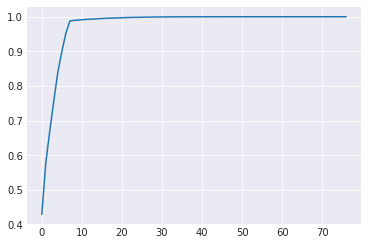

In [64]:
sns.set_style("darkgrid")
plt.plot(cumsum)
plt.show()

In [65]:
pca = PCA(n_components = 7)
X_reduced = pca.fit_transform(X_scaled)

In [66]:
X_reduced.shape

(14071, 7)

In [67]:
X_pca = X_reduced

In [68]:
y.shape

(140707,)

In [69]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,sample_target,random_state=0,test_size = 0.2)

# KNN with PCA

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_knn = {'n_neighbors':[1, 5, 10, 15, 20]} 
print("Parameter grid:\n{}".format(param_knn))
grid_knn = GridSearchCV(knn, param_grid=param_knn, cv = 5, scoring= 'f1')

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


In [71]:
grid_knn.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [72]:
print("Best parameters: {}".format(grid_knn.best_params_))

Best parameters: {'n_neighbors': 15}


In [73]:
print("Training Score: {}".format(grid_knn.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_knn.score(X_test_pca, y_test_pca)))

Training Score: 0.89720868409393
Testing Score: 0.8777372262773723


In [74]:
from sklearn.metrics import roc_auc_score
y_knn_predict = grid_knn.predict(X_test_pca)
y_knn_train_predict = grid_knn.predict(X_train_pca)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train_pca))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test_pca))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.93 


<IPython.core.display.Javascript object>


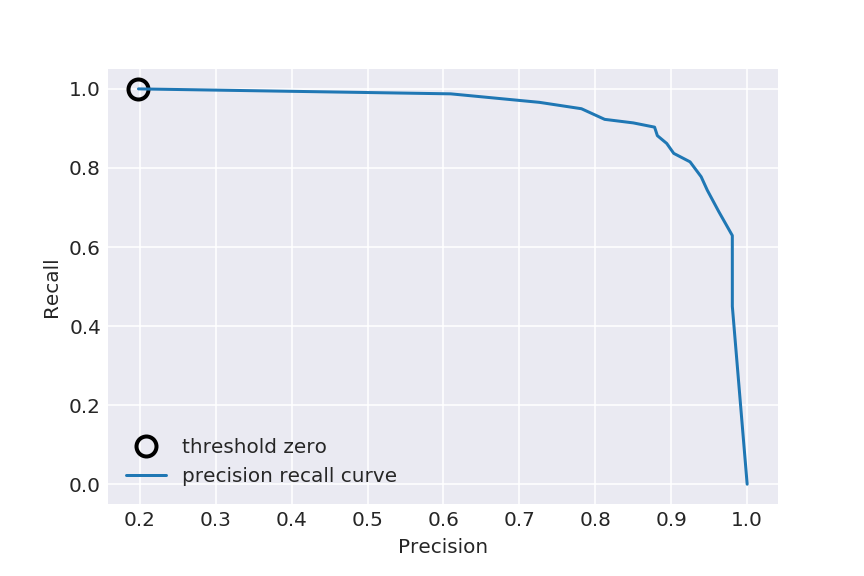

In [128]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook

precision, recall, thresholds = precision_recall_curve(y_test_pca,grid_knn.predict_proba(X_test_pca)[:, 1])

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [76]:
report_table = []
report_table = [['knn', 'k = 20', grid_knn.score(X_train_pca, y_train_pca), grid_knn.score(X_test_pca, y_test_pca), roc_auc_score(y_knn_train_predict, y_train_pca), roc_auc_score(y_knn_predict, y_test_pca)]]
report_table

[['knn',
  'k = 20',
  0.89720868409393,
  0.8777372262773723,
  0.9361487647327509,
  0.9301178097444464]]

# Logistic Regression With PCA

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0)
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty' :['l1','l2']}
print("Parameter grid:\n{}".format(param_log))
grid_log = GridSearchCV(estimator = log_model, param_grid = param_log, cv=5, scoring= 'f1', return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}


In [78]:

import warnings
warnings.filterwarnings("ignore")
grid_log.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [79]:
print("Best parameters: {}".format(grid_log.best_params_))

Best parameters: {'C': 100, 'penalty': 'l1'}


In [80]:
print("Training Score: {}".format(grid_log.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_log.score(X_test_pca, y_test_pca)))

Training Score: 0.881572930955647
Testing Score: 0.8824626865671641


In [81]:
from sklearn.metrics import roc_auc_score
y_log_predict = grid_log.predict(X_test_pca)
y_log_train_predict = grid_log.predict(X_train_pca)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_log_train_predict, y_train_pca))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_log_predict, y_test_pca))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.94 


<IPython.core.display.Javascript object>


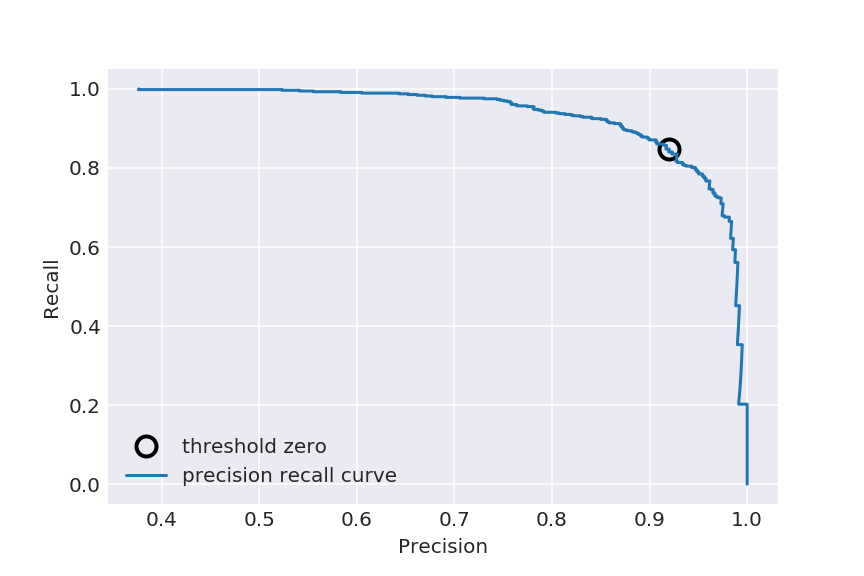

In [127]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test_pca, grid_log.decision_function(X_test_pca))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [83]:
report_table = report_table + [['Logistic Regression', grid_log.best_params_, grid_log.score(X_train_pca, y_train_pca), grid_log.score(X_test_pca, y_test_pca), roc_auc_score(y_log_train_predict, y_train_pca), roc_auc_score(y_log_predict, y_test_pca)]]

# Linear SVM with PCA

In [84]:
from sklearn.svm import LinearSVC
model_Linear_SVM = LinearSVC(random_state=0)
param_Linear_SVM = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(param_Linear_SVM))
grid_Linear_SVM = GridSearchCV(model_Linear_SVM, param_grid = param_Linear_SVM, cv=5, scoring='f1', return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [85]:
grid_Linear_SVM.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [86]:
print("Best parameters: {}".format(grid_Linear_SVM.best_params_))

Best parameters: {'C': 10}


In [87]:
print("Training Score: {}".format(grid_Linear_SVM.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_Linear_SVM.score(X_test_pca, y_test_pca)))

Training Score: 0.8789134438305709
Testing Score: 0.8780487804878049


In [88]:
from sklearn.metrics import roc_auc_score
y_linsvc_predict = grid_Linear_SVM.predict(X_test_pca)
y_linsvc_train_predict = grid_Linear_SVM.predict(X_train_pca)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_linsvc_train_predict, y_train_pca))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_linsvc_predict, y_test_pca))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.94 


<IPython.core.display.Javascript object>


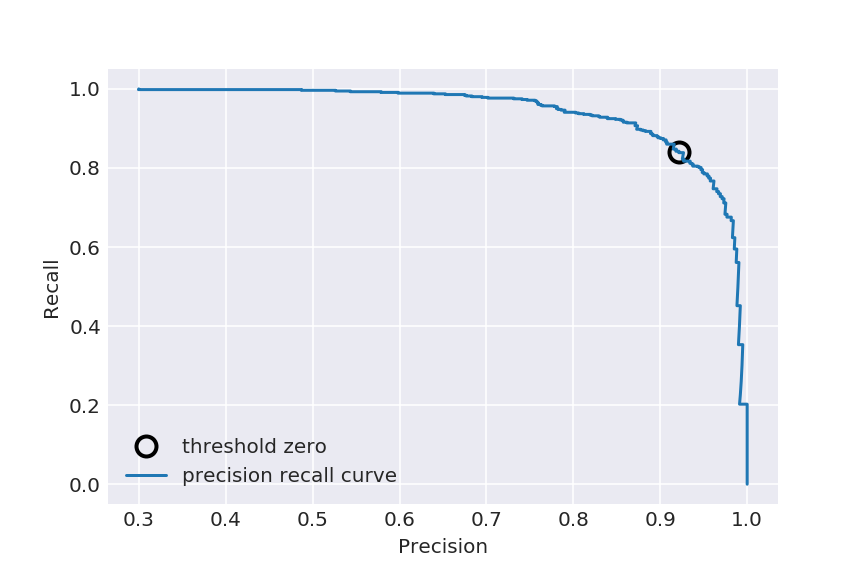

In [126]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test_pca, grid_Linear_SVM.decision_function(X_test_pca))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [90]:
report_table = report_table + [['Linear SVM', grid_Linear_SVM.best_params_, grid_Linear_SVM.score(X_train_pca, y_train_pca), grid_Linear_SVM.score(X_test_pca, y_test_pca), roc_auc_score(y_linsvc_train_predict, y_train_pca), roc_auc_score(y_linsvc_predict, y_test_pca)]]

# SVM with Radial Kernel using PCA

In [91]:
# Due to computational time we took 5% of data for Radial and polynomial svm.Therefore again we will take 5% in this project to compare 
#results from project 2
from sklearn.model_selection import train_test_split
_, sample_data_svm, _, sample_target_svm = train_test_split(X, y, shuffle = True, test_size = 0.05,random_state = 0)





In [92]:
X_scaled_svm = scaler.fit_transform(sample_data_svm)

from sklearn.decomposition import PCA
pca_svm = PCA()
pca_svm.fit(X_scaled_svm)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d


7

In [93]:
pca_svm = PCA(n_components = 7)
X_reduced_svm = pca.fit_transform(X_scaled_svm)

In [94]:
X_reduced_svm.shape

(7036, 7)

In [95]:
X_pca_svm = X_reduced_svm

In [96]:
sample_target.shape

(14071,)

In [97]:
X_train_svm_pca, X_test_svm_pca, y_train_svm_pca, y_test_svm_pca = train_test_split(X_pca_svm,sample_target_svm, random_state=0,test_size = 0.2)



In [98]:
from sklearn.svm import SVC
model_Radial_SVM = SVC(kernel = 'rbf',random_state=0)
param_Radial_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Radial_SVM))
grid_Radial_SVM = GridSearchCV(model_Radial_SVM, param_grid = param_Radial_SVM, cv=5,scoring='f1', return_train_score=True, n_jobs = 16)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [99]:
grid_Radial_SVM.fit(X_train_svm_pca, y_train_svm_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [100]:
print("Best parameters: {}".format(grid_Radial_SVM.best_params_))

Best parameters: {'C': 100, 'gamma': 1}


In [101]:
print("Training Score: {}".format(grid_Radial_SVM.score(X_train_svm_pca, y_train_svm_pca)))
print("Testing Score: {}".format(grid_Radial_SVM.score(X_test_svm_pca, y_test_svm_pca)))

Training Score: 0.8877917414721723
Testing Score: 0.8838821490467939


In [102]:
from sklearn.metrics import roc_auc_score
y_radsvc_predict = grid_Radial_SVM.predict(X_test_svm_pca)
y_radsvc_train_predict = grid_Radial_SVM.predict(X_train_svm_pca)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_radsvc_train_predict, y_train_svm_pca))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_radsvc_predict, y_test_svm_pca))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.93 


<IPython.core.display.Javascript object>


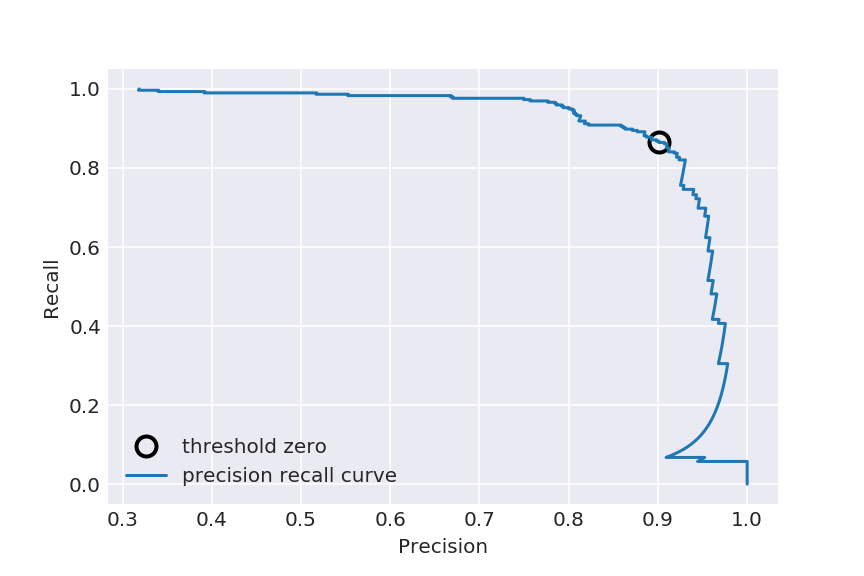

In [125]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test_svm_pca, grid_Radial_SVM.decision_function(X_test_svm_pca))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [104]:
report_table = report_table + [['Radial SVM', grid_Radial_SVM.best_params_, grid_Radial_SVM.score(X_train_svm_pca, y_train_svm_pca), grid_Radial_SVM.score(X_test_svm_pca, y_test_svm_pca), roc_auc_score(y_radsvc_train_predict, y_train_svm_pca), roc_auc_score(y_radsvc_predict, y_test_svm_pca)]]

# Polynomial SVM With PCA


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model_Poly_SVM = SVC(kernel = 'poly', degree = 2,random_state=0)
param_Poly_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Poly_SVM))
grid_Poly_SVM = GridSearchCV(model_Poly_SVM, param_grid = param_Poly_SVM,scoring='f1', cv=5, return_train_score=True, n_jobs = 16)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [106]:
grid_Poly_SVM.fit(X_train_svm_pca, y_train_svm_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=16,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [107]:
print("Best parameters: {}".format(grid_Poly_SVM.best_params_))

Best parameters: {'C': 100}


In [108]:
print("Training Score: {}".format(grid_Poly_SVM.score(X_train_svm_pca, y_train_svm_pca)))
print("Testing Score: {}".format(grid_Poly_SVM.score(X_test_svm_pca, y_test_svm_pca)))

Training Score: 0.8426197458455523
Testing Score: 0.8235294117647058


In [109]:
from sklearn.metrics import roc_auc_score
y_Polysvc_predict = grid_Poly_SVM.predict(X_test_svm_pca)
y_Polysvc_train_predict = grid_Poly_SVM.predict(X_train_svm_pca)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_Polysvc_train_predict, y_train_svm_pca))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_Polysvc_predict, y_test_svm_pca))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.93 


<IPython.core.display.Javascript object>


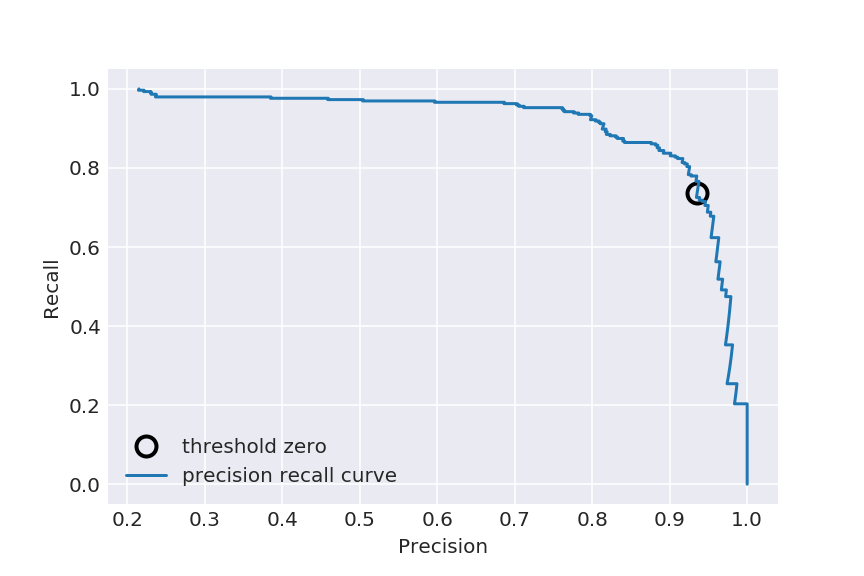

In [124]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test_svm_pca, grid_Poly_SVM.decision_function(X_test_svm_pca))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [111]:
report_table = report_table + [['Polynomial SVM', grid_Poly_SVM.best_params_, grid_Poly_SVM.score(X_train_pca, y_train_pca), grid_Poly_SVM.score(X_test_svm_pca, y_test_svm_pca), roc_auc_score(y_Polysvc_train_predict, y_train_svm_pca), roc_auc_score(y_Polysvc_predict, y_test_svm_pca)]]

# Desicion Tree With PCA

In [112]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=0)
param_tree = {'max_depth': [1,2,3,4,5,6,7,8, 9, 10], 'criterion': ['gini','entropy']}
print("Parameter grid:\n{}".format(param_tree))
grid_dtree = GridSearchCV(model_dtree, param_grid = param_tree, cv=5,scoring='f1',return_train_score=True)

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}


In [113]:
grid_dtree.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [114]:
print("Best parameters: {}".format(grid_dtree.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 6}


In [115]:
print("Training Score: {}".format(grid_dtree.score(X_train_pca, y_train_pca)))
print("Testing Score: {}".format(grid_dtree.score(X_test_pca, y_test_pca)))

Training Score: 0.9040671971706455
Testing Score: 0.8828337874659401


In [116]:
from sklearn.metrics import roc_auc_score
y_dtree_predict = grid_dtree.predict(X_test_pca)
y_dtree_train_predict = grid_dtree.predict(X_train_pca)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dtree_train_predict, y_train_pca))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dtree_predict, y_test_pca))

Train roc_auc_score: 0.94
Test roc_auc_score: 0.93 


<IPython.core.display.Javascript object>


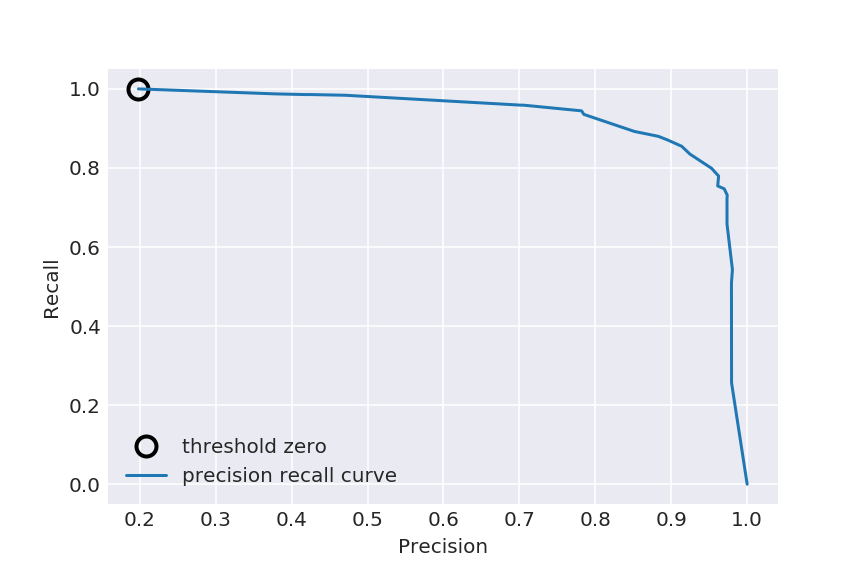

In [122]:
from sklearn.metrics import precision_recall_curve
%matplotlib notebook

precision, recall, thresholds = precision_recall_curve(y_test_pca,grid_dtree.predict_proba(X_test_pca)[:, 1])

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

In [118]:
report_table = report_table + [['Desicion Tree', grid_dtree.best_params_, grid_dtree.score(X_train_pca, y_train_pca), grid_dtree.score(X_test_pca, y_test_pca), roc_auc_score(y_dtree_train_predict, y_train_pca), roc_auc_score(y_dtree_predict, y_test_pca)]]

In [119]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Best Parameters', 'Train F1 Score', 'Test F1 Score', 'Train auc score', 'Test auc score'])

In [120]:
report.index = report['Model name']
report

,Model name,Best Parameters,Train F1 Score,Test F1 Score,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 20,0.897209,0.877737,0.936149,0.930118
Logistic Regression,Logistic Regression,"{'C': 100, 'penalty': 'l1'}",0.881573,0.882463,0.937850,0.941647
Linear SVM,Linear SVM,{'C': 10},0.878913,0.878049,0.938879,0.941124
Radial SVM,Radial SVM,"{'C': 100, 'gamma': 1}",0.887792,0.883882,0.935105,0.934366
Polynomial SVM,Polynomial SVM,{'C': 100},0.707260,0.823529,0.942500,0.934509
Desicion Tree,Desicion Tree,"{'criterion': 'entropy', 'max_depth': 6}",0.904067,0.882834,0.939679,0.931669


#Results from Project2 in order Model Name, Best PArameter, Train F1 score, Test F1 score, Train auc, Test auc

Model name	Best Parameters	Train F1 Score	Test F1 Score	Train auc score	Test auc score
						
knn	knn	k = 20	0.921794	0.894640	0.957843	0.945682
Logistic Regression	Logistic Regression	{'C': 1000, 'penalty': 'l2'}	0.905815	0.899814	0.952290	0.950442
Linear SVM	Linear SVM	{'C': 10}	0.901252	0.895970	0.956053	0.952202
Radial SVM	Radial SVM	{'C': 100, 'gamma': 1}	0.912648	0.888889	0.955977	0.932623
Polynomial SVM	Polynomial SVM	{'C': 100}	0.865394	0.858195	0.945492	0.943034
Desicion Tree	Desicion Tree	{'criterion': 'gini', 'max_depth': 3}	0.908285	0.892889	0.943083	0.934758

## Report of Project -2 

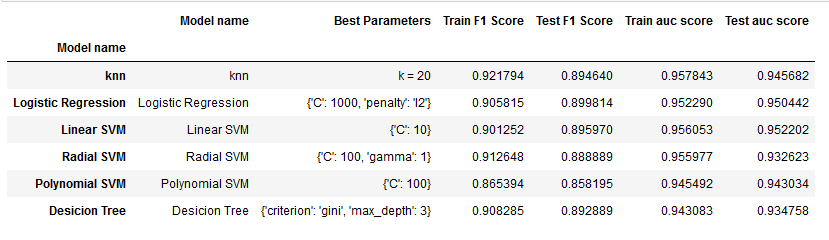

In [2]:
from IPython.display import Image
Image(filename='imgclass.PNG')

###  As we can see from the two reports, for almost every model the F-1 score and the AUC score is reduced when applied on the PCA transformed data. This can be attributed to the fact that, we have taken only 8 principal componets that explain only 98% variance of the original dataset. So resulting 2% variance loss is causing the models to have a lesser F-1 score and AUC score.

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(10)

# Sequentional model Using Kera

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [69]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=77,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [83]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# Fit the model
model.fit(X_train, y_train, epochs=500, batch_size=150)

Epoch 1/500
11256/11256 [==============================] - 1s 78us/step - loss: 0.3598 - acc: 0.8534
Epoch 2/500
11256/11256 [==============================] - 0s 23us/step - loss: 0.1159 - acc: 0.9542
Epoch 3/500
11256/11256 [==============================] - 0s 22us/step - loss: 0.1099 - acc: 0.9574
Epoch 4/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.1190 - acc: 0.9534
Epoch 5/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.1071 - acc: 0.9580
Epoch 6/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.1049 - acc: 0.9580
Epoch 7/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.1046 - acc: 0.9575
Epoch 8/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.1060 - acc: 0.9570
Epoch 9/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.1028 - acc: 0.9597
Epoch 10/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.1010 - a

11256/11256 [==============================] - 0s 21us/step - loss: 0.0902 - acc: 0.9654
Epoch 161/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0898 - acc: 0.9654
Epoch 162/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.0892 - acc: 0.9650
Epoch 163/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0890 - acc: 0.9655
Epoch 164/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.0895 - acc: 0.9648
Epoch 165/500
11256/11256 [==============================] - 0s 23us/step - loss: 0.0888 - acc: 0.9661
Epoch 166/500
11256/11256 [==============================] - 0s 23us/step - loss: 0.0890 - acc: 0.9654
Epoch 167/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.0905 - acc: 0.9652
Epoch 168/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.0910 - acc: 0.9646
Epoch 169/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.090

11256/11256 [==============================] - 0s 23us/step - loss: 0.0825 - acc: 0.9674
Epoch 318/500
11256/11256 [==============================] - 0s 22us/step - loss: 0.0845 - acc: 0.9681
Epoch 319/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0837 - acc: 0.9671
Epoch 320/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0844 - acc: 0.9658
Epoch 321/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0820 - acc: 0.9679
Epoch 322/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0837 - acc: 0.9679
Epoch 323/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0833 - acc: 0.9673
Epoch 324/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0835 - acc: 0.9678
Epoch 325/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.0825 - acc: 0.9683
Epoch 326/500
11256/11256 [==============================] - 0s 20us/step - loss: 0.084

11256/11256 [==============================] - 0s 28us/step - loss: 0.0770 - acc: 0.9690
Epoch 476/500
11256/11256 [==============================] - 0s 25us/step - loss: 0.0767 - acc: 0.9697
Epoch 477/500
11256/11256 [==============================] - 0s 24us/step - loss: 0.0785 - acc: 0.9685
Epoch 478/500
11256/11256 [==============================] - 0s 25us/step - loss: 0.0771 - acc: 0.9701
Epoch 479/500
11256/11256 [==============================] - 0s 24us/step - loss: 0.0777 - acc: 0.9695
Epoch 480/500
11256/11256 [==============================] - 0s 24us/step - loss: 0.0866 - acc: 0.9663
Epoch 481/500
11256/11256 [==============================] - 0s 27us/step - loss: 0.0786 - acc: 0.9687
Epoch 482/500
11256/11256 [==============================] - 0s 21us/step - loss: 0.0775 - acc: 0.9694
Epoch 483/500
11256/11256 [==============================] - 0s 26us/step - loss: 0.0764 - acc: 0.9701
Epoch 484/500
11256/11256 [==============================] - 0s 25us/step - loss: 0.082

In [85]:
# evaluate the model
from  sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
scores = model.evaluate(X_test, y_test)

2815/2815 [==============================] - 0s 56us/step


In [86]:
y_predict_N = model.predict_classes(X_test)
print({'f1-Score': f1_score(y_test, y_predict_N)})
print({'auc': roc_auc_score(y_test, y_predict_N)})

{'f1-Score': 0.9146005509641872}
{'auc': 0.9389259698619826}
